In [51]:
import geopandas as gpd

mainLink='https://github.com/DACSS-CSSmeths/Spatial-Exploring/raw/refs/heads/main/maps/countriesCIA.gpkg'
mapsLink=(mainLink,'maps/countriesCIA.gpkg')


gpd.list_layers(mainLink)

cia=gpd.read_file(mainLink, layer='cia')

In [53]:
import mapclassify 

In [55]:
import numpy as np

np.random.seed(12345) 

K=5
theVar=cia.obesityAdults_rate


# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(theVar,k=K)
# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K) 

###### based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed

In [57]:
import pandas as pd

class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

In [59]:
import matplotlib.pyplot as plt

In [61]:
cia['obesity_code']=fj5.yb

cia=cia.assign(obesity_levels=cia.obesity_code)

In [63]:
newLevels={0:'1.very low',1:'2.low', 2:'3.average',3:'4.high', 4:'5.very high'}

cia.replace({'obesity_levels':newLevels}, inplace=True)

cia.obesity_levels.value_counts()

obesity_levels
2.low          50
1.very low     44
3.average      38
4.high         11
5.very high     4
Name: count, dtype: int64

In [65]:
countries=gpd.read_file(mainLink, layer='border')
worldBorders=countries.dissolve()

In [66]:
topcountries=cia[(cia.tobacco_code==0) & (cia.alcohol_code==0) & (cia.obesity_code==0)]
topcountries

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,geometry,obesity_code,obesity_levels
17,Benin,Benin,Africa,9.6,6.9,1.25,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((2.733 7.6582, 2.7322 7.6519, 2...",0,1.very low
26,Chad,Chad,Africa,6.1,8.3,0.55,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((14.195 9.9818, 14.451 9.9981, ...",0,1.very low
42,Eritrea,Eritrea,Africa,5.0,7.5,0.93,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((42.068 13.698, 42.09 13.678, 4...",0,1.very low
44,Ethiopia,Ethiopia,Africa,4.5,5.1,1.16,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((45.489 5.4898, 45.374 5.3639, ...",0,1.very low
49,Ghana,Ghana,Africa,10.9,3.5,1.59,0,1.very low,1. below5,0,1.very low,"MULTIPOLYGON (((0.32238 6.0358, 0.35375 6.0233...",0,1.very low
83,Mali,Mali,Africa,8.6,8.3,0.60,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((-9.8652 12.055, -9.9119 12.093...",0,1.very low
86,Mauritania,Mauritania,Africa,12.7,10.7,0.00,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((-6.336 22.99, -6.3258 22.906, ...",0,1.very low
94,Niger,Niger,Africa,5.5,7.4,0.11,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((7.0281 12.996, 6.9422 12.997, ...",0,1.very low
118,Senegal,Senegal,Africa,8.8,6.9,0.25,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((-14.342 12.679, -14.393 12.679...",0,1.very low
128,Togo,Togo,Africa,8.4,6.8,1.40,0,1.very low,2.(5-15],0,1.very low,"MULTIPOLYGON (((1.6554 7.5298, 1.6501 7.5139, ...",0,1.very low


In [67]:
maskToClip=topcountries.dissolve().envelope

In [71]:
miniWorld=worldBorders.clip(maskToClip)

In [73]:
allCoords=[x.coords[:][0] for x in topcountries.representative_point()]
allCoords
topcountries=topcountries.assign(coordinates=allCoords)

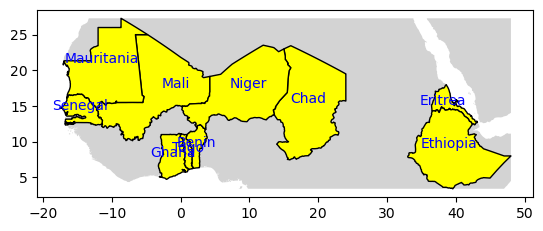

In [75]:
base=miniWorld.plot(color='lightgrey')
topcountries.plot(color='yellow', edgecolor='black',ax=base)
for idx, row in topcountries.iterrows():
   plt.annotate(text=row['name'], xy=row['coordinates'], horizontalalignment='center', color='blue')

In [79]:
jupyter nbconvert index.ipynb --to html

SyntaxError: invalid syntax (3927889449.py, line 1)